In [1]:
#for dataframe maulpulations and calculations
import pandas as pd
import numpy as np
#for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
#for knn, linear regression and decision tree algorithms
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import re


#for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#to get consistent results.
import random
random.seed(0)

## 1. Data Preparation

In [2]:
#loading and previewing the data
df=pd.read_excel('cars.xlsx')
df.head(5)

,fuel,aspiration,num_of_doors,drive_wheels,engine_location,wheelbase,length,width,height,curbweight,numofcylinders,enginesize,bore,stroke,compression_ratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,std,two,rwd,front,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,std,four,fwd,front,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,std,four,4wd,front,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
#checking the shape
df.shape

(205, 20)

In [4]:
# replace ? with NaN that python recognizes as missing value
df.replace(to_replace="?",value=np.NaN,inplace=True)

In [5]:
#counting the number of null values
df.isna().sum()

fuel                 0
aspiration           0
num_of_doors         2
drive_wheels         0
engine_location      0
wheelbase            0
length               0
width                0
height               0
curbweight           0
numofcylinders       0
enginesize           0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peakrpm              2
citympg              0
highwaympg           0
price                4
dtype: int64

In [6]:
# dropping null values
df.dropna(inplace=True)

In [7]:
#checking necessary information and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fuel               193 non-null    object 
 1   aspiration         193 non-null    object 
 2   num_of_doors       193 non-null    object 
 3   drive_wheels       193 non-null    object 
 4   engine_location    193 non-null    object 
 5   wheelbase          193 non-null    float64
 6   length             193 non-null    float64
 7   width              193 non-null    float64
 8   height             193 non-null    float64
 9   curbweight         193 non-null    int64  
 10  numofcylinders     193 non-null    object 
 11  enginesize         193 non-null    int64  
 12  bore               193 non-null    float64
 13  stroke             193 non-null    float64
 14  compression_ratio  193 non-null    float64
 15  horsepower         193 non-null    float64
 16  peakrpm            193 non

## 2. Univariate Analysis

In [8]:
#descriptive statistics of numeric columns
df.describe()

,wheelbase,length,width,height,curbweight,enginesize,bore,stroke,compression_ratio,horsepower,peakrpm,citympg,highwaympg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


**INFERENCE:** Can see some outliers in the data, will decide if we want to remove them while conducting univariate analysis.

In [9]:
#descriptive statistics of categorical columns
df.describe(include='object')

,fuel,aspiration,num_of_doors,drive_wheels,engine_location,numofcylinders
count,193,193,193,193,193,193
unique,2,2,2,3,2,6
top,gas,std,four,fwd,front,four
freq,174,158,112,114,190,153


**INFERENCE:** None of the columns have high cardinality. Infact, we have low cardinality.

In [10]:
#function to plot graphs

def plot_num(df,col):
    fig ,ax = plt.subplots(1,2,figsize=(16,4))
    sns.histplot(df,x=col,kde=True,ax=ax[0])
    sns.boxplot(df,x=col,ax=ax[1])
    ax[0].set_title(f'Distribution of {col}')
    ax[1].set_title(f'{col} Boxplot')
    fig.show();

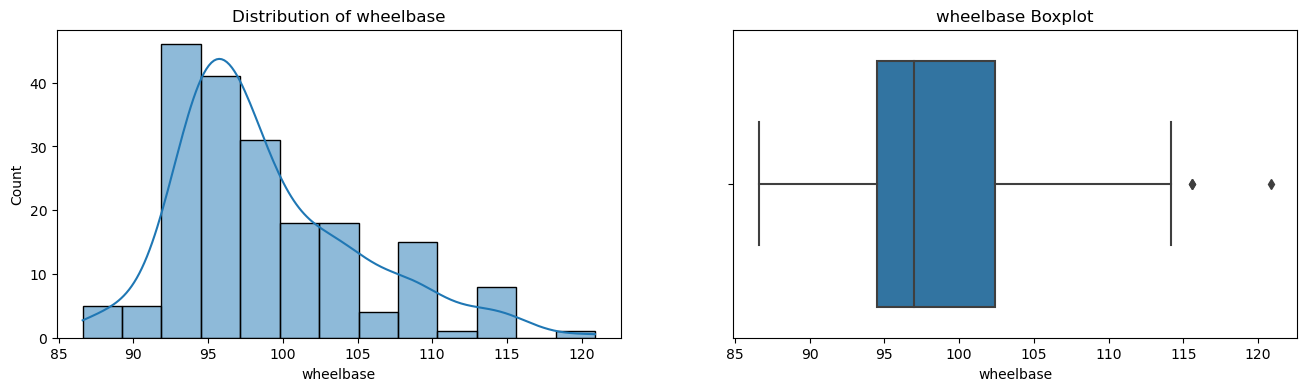

In [11]:
#distribution of wheelbase
plot_num(df,'wheelbase')

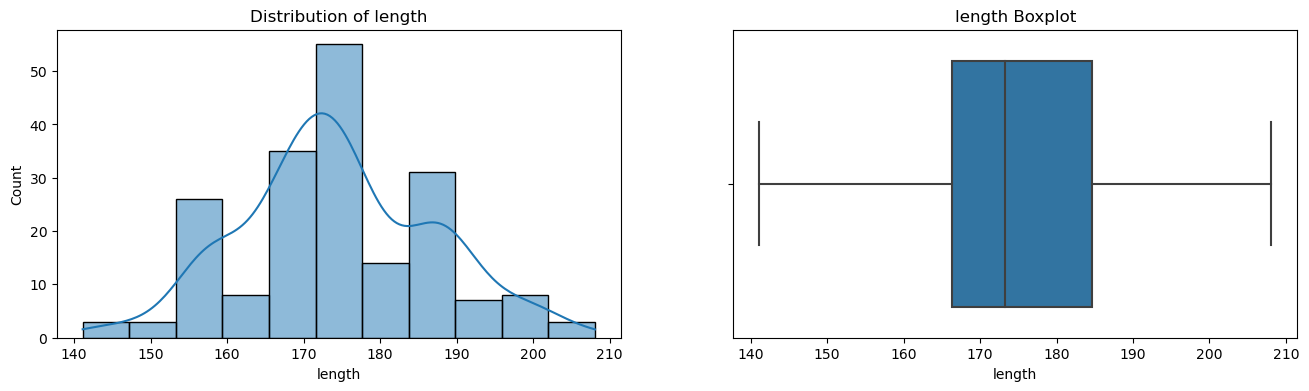

In [12]:
#distribution of length
plot_num(df,'length')

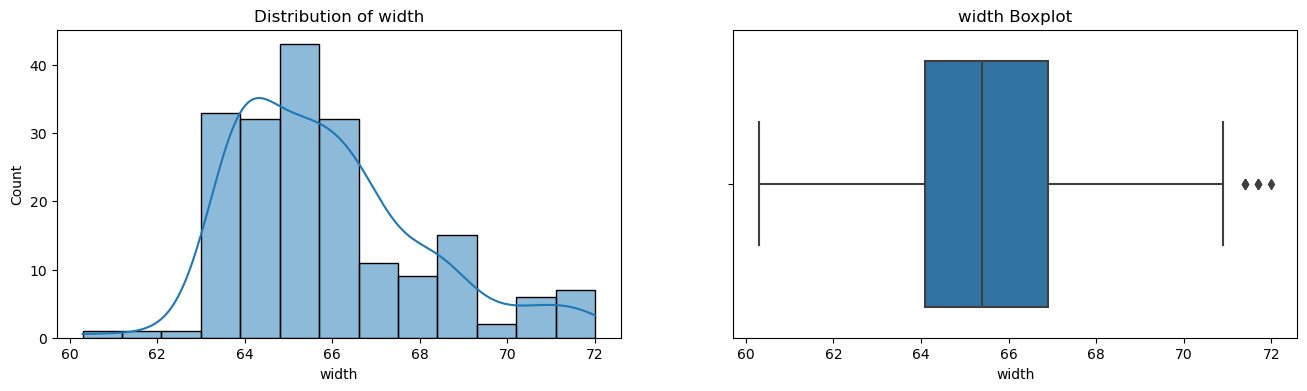

In [13]:
#distribution of width
plot_num(df,'width')

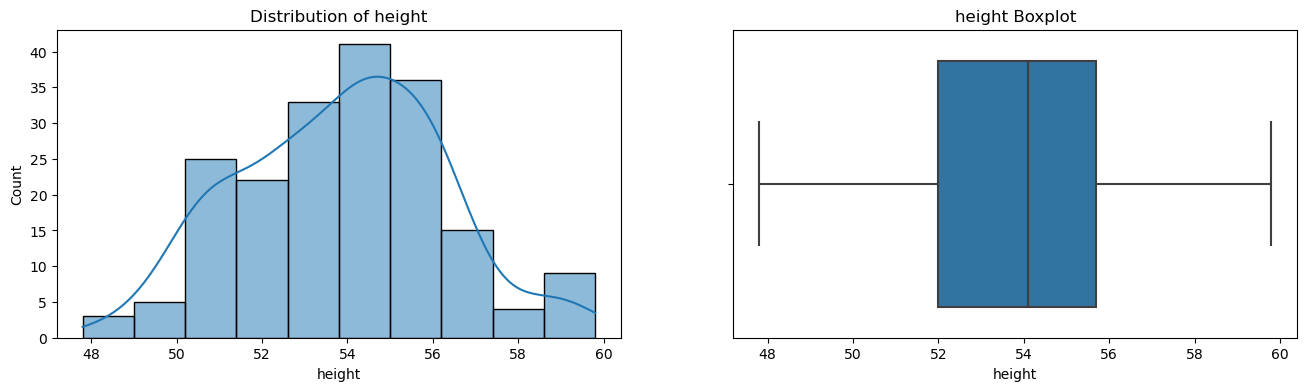

In [14]:
#distribution of height
plot_num(df,'height')

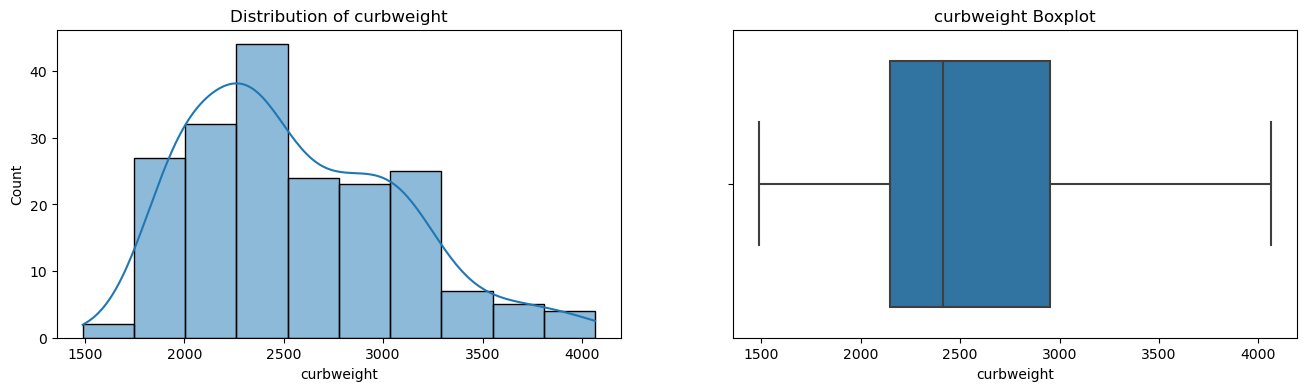

In [15]:
#distribution of curbweight
plot_num(df,'curbweight')

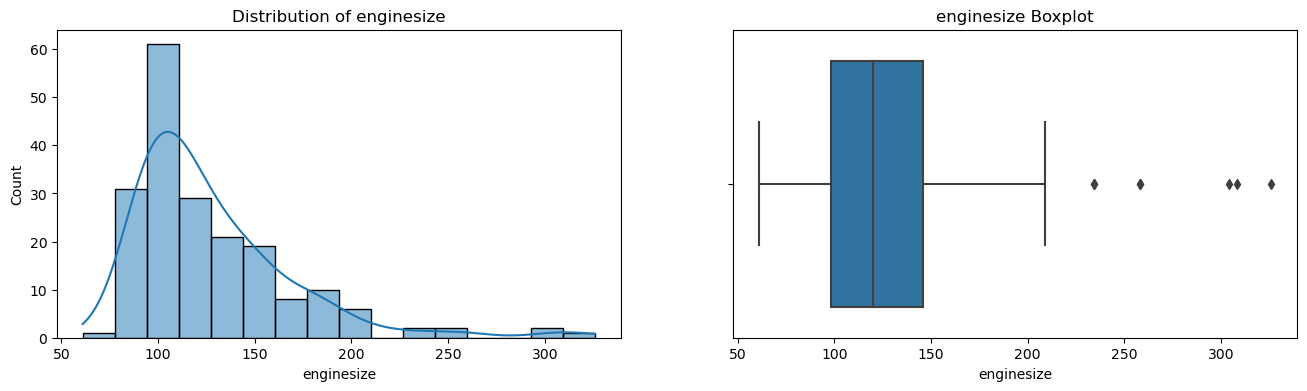

In [16]:
#distribution of enginesize
plot_num(df,'enginesize')

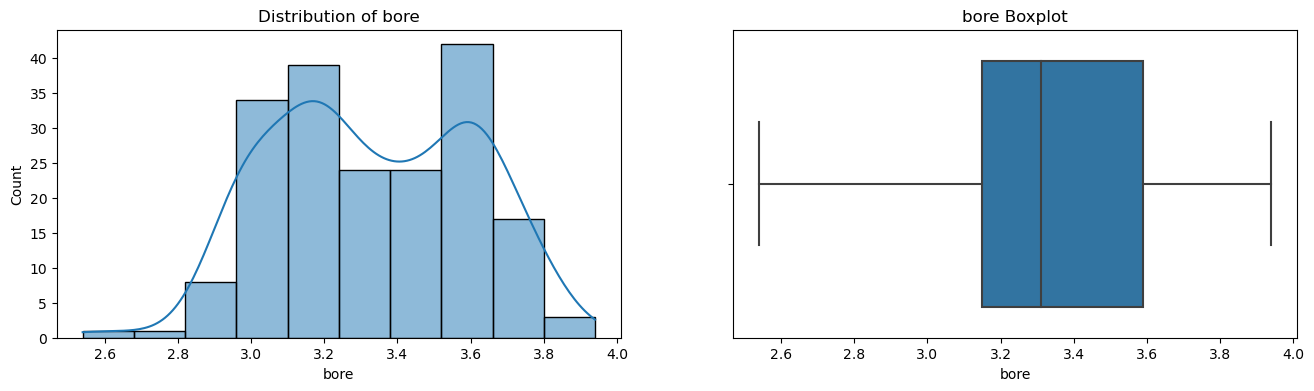

In [17]:
#distribution of bore
plot_num(df,'bore')

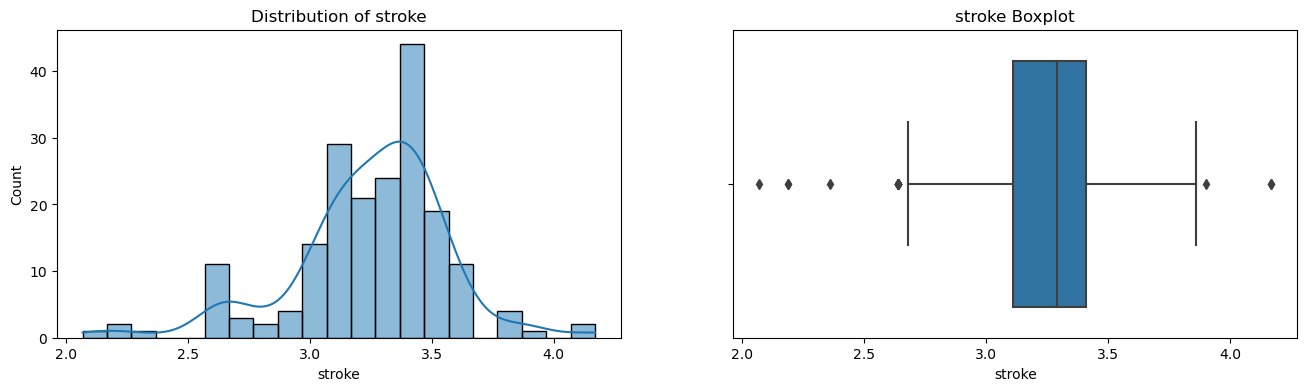

In [18]:
#distribution of stroke
plot_num(df,'stroke')

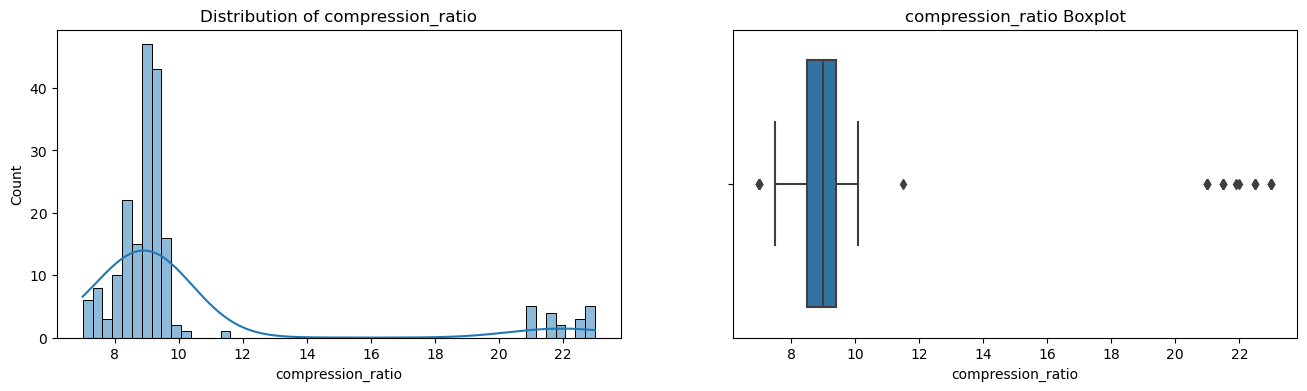

In [19]:
#distribution of compression_ratio
plot_num(df,'compression_ratio')

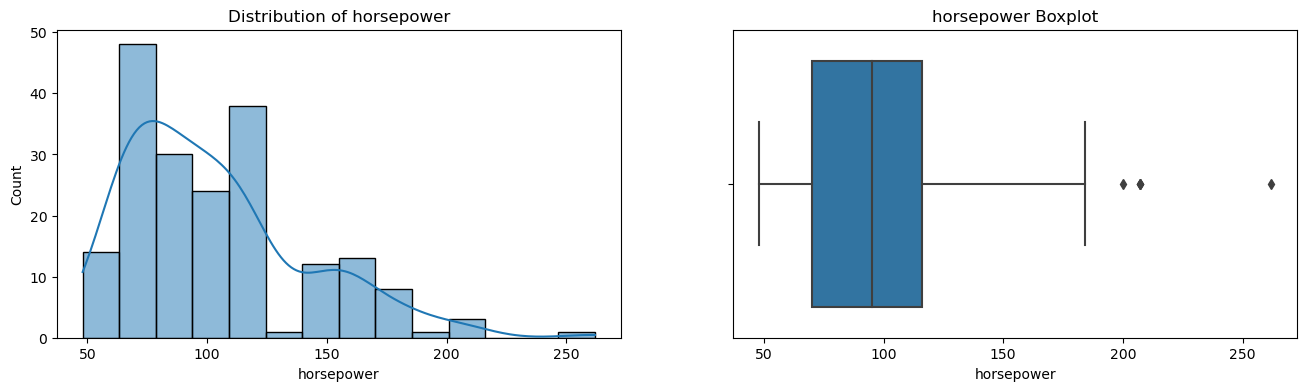

In [20]:
#distribution of horsepower
plot_num(df,'horsepower')

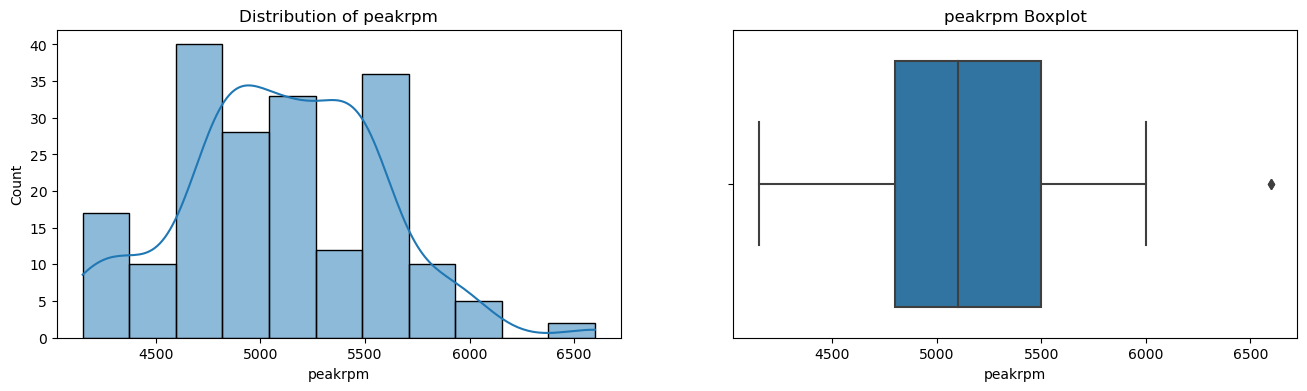

In [21]:
#distribution of peakrpm
plot_num(df,'peakrpm')

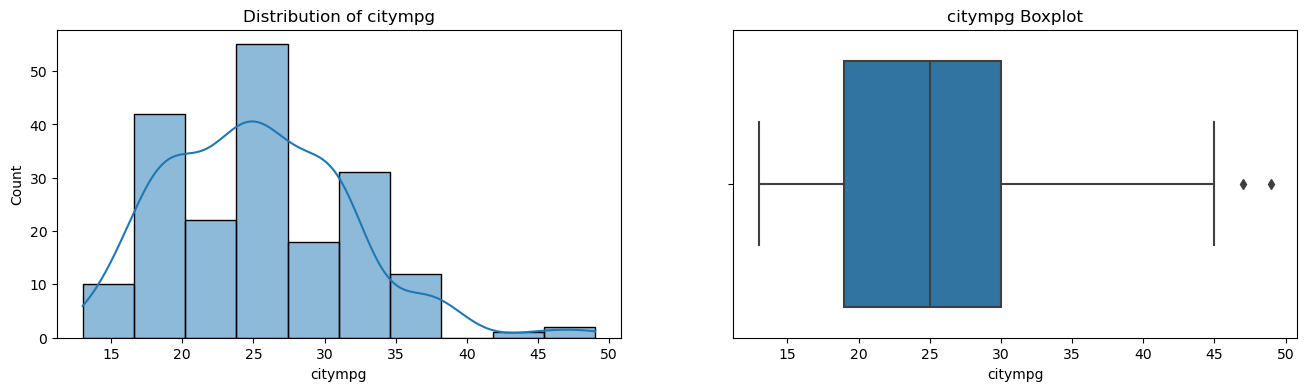

In [22]:
#distribution of citympg
plot_num(df,'citympg')

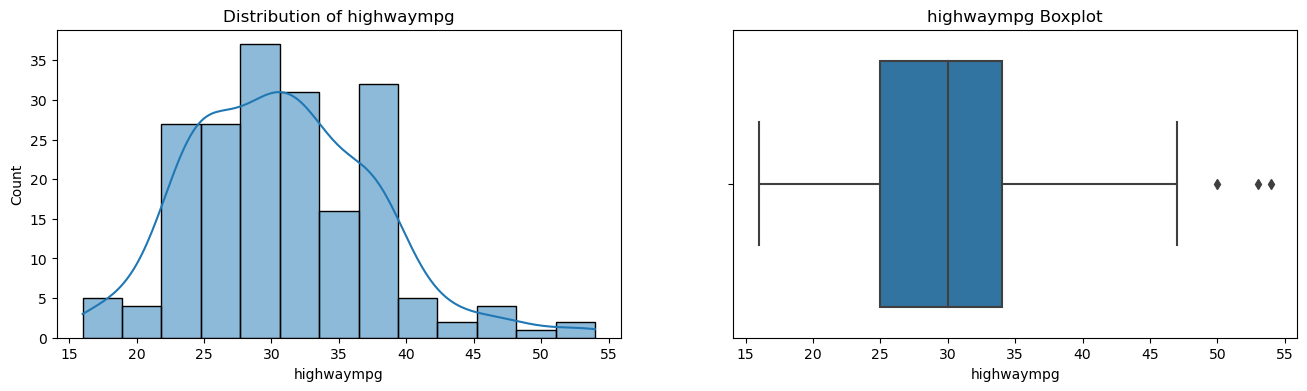

In [23]:
#distribution of highwaympg
plot_num(df,'highwaympg')

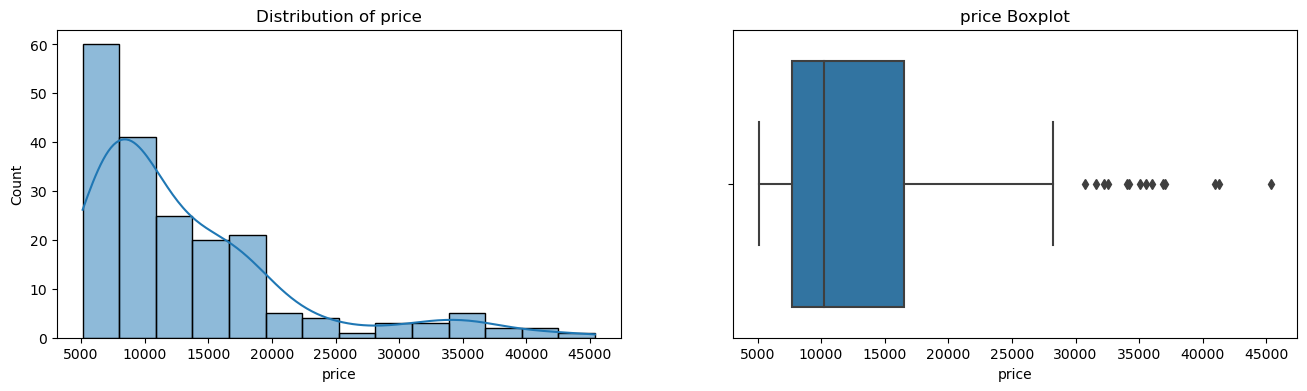

In [24]:
#distribution of price
plot_num(df,'price')

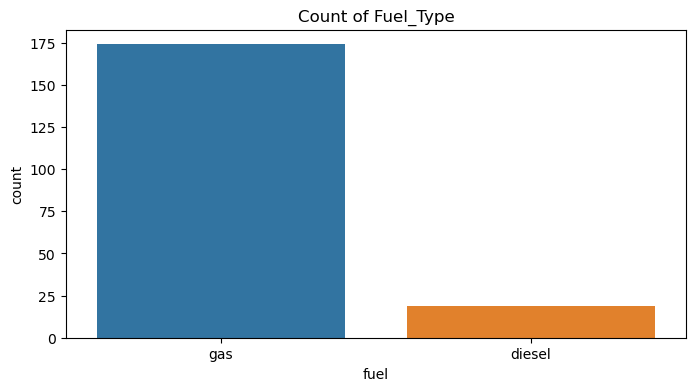

In [25]:
#count of fuel types
plt.figure(figsize=(8,4))
sns.countplot(df,x='fuel');
plt.title('Count of Fuel_Type');

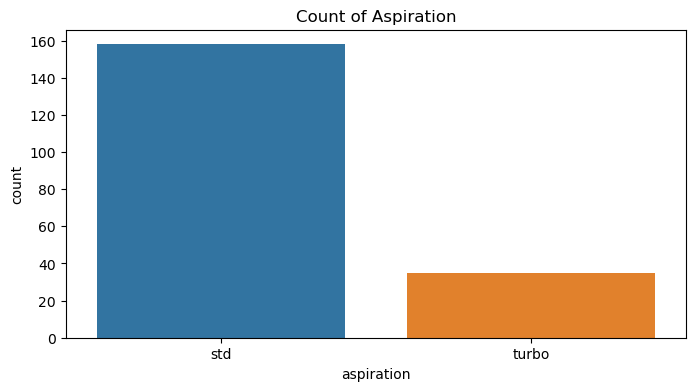

In [26]:
#count of aspiration
plt.figure(figsize=(8,4))
sns.countplot(df,x='aspiration');
plt.title('Count of Aspiration');

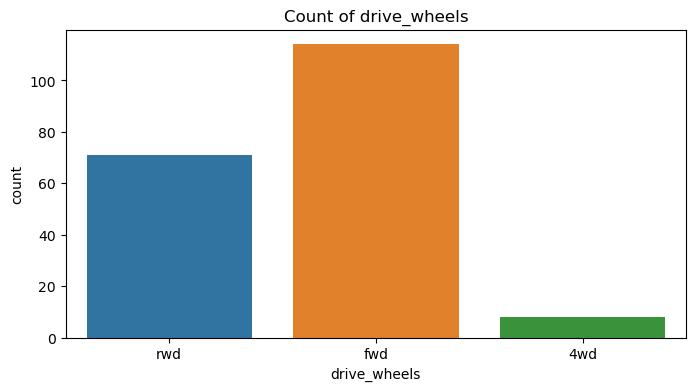

In [27]:
#count of drive_wheels
plt.figure(figsize=(8,4))
sns.countplot(df,x='drive_wheels');
plt.title('Count of drive_wheels');

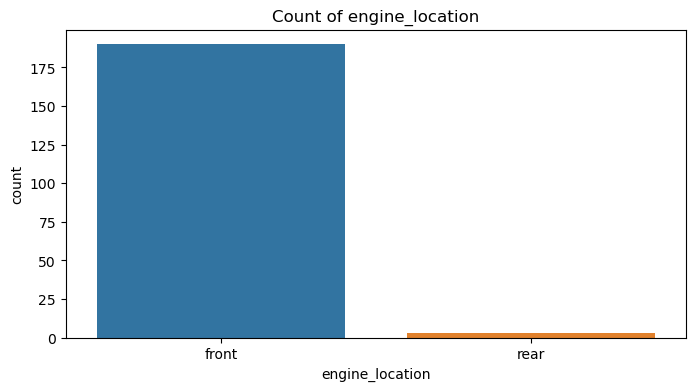

In [28]:
#count of engine_location
plt.figure(figsize=(8,4))
sns.countplot(df,x='engine_location');
plt.title('Count of engine_location');

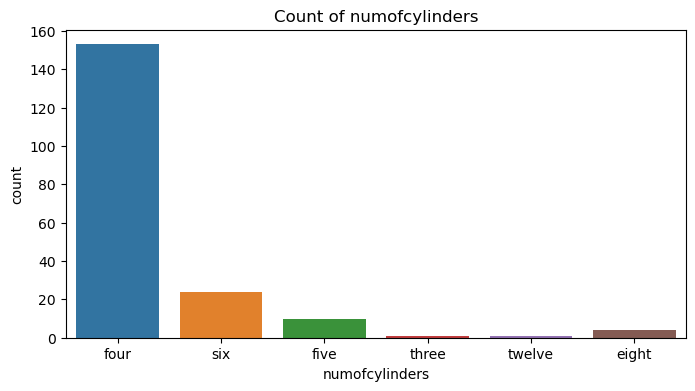

In [29]:
#count of numofcylinders
plt.figure(figsize=(8,4))
sns.countplot(df,x='numofcylinders');
plt.title('Count of numofcylinders');

In [30]:
df_knn = df.copy()

## 3. Bivariate Analysis

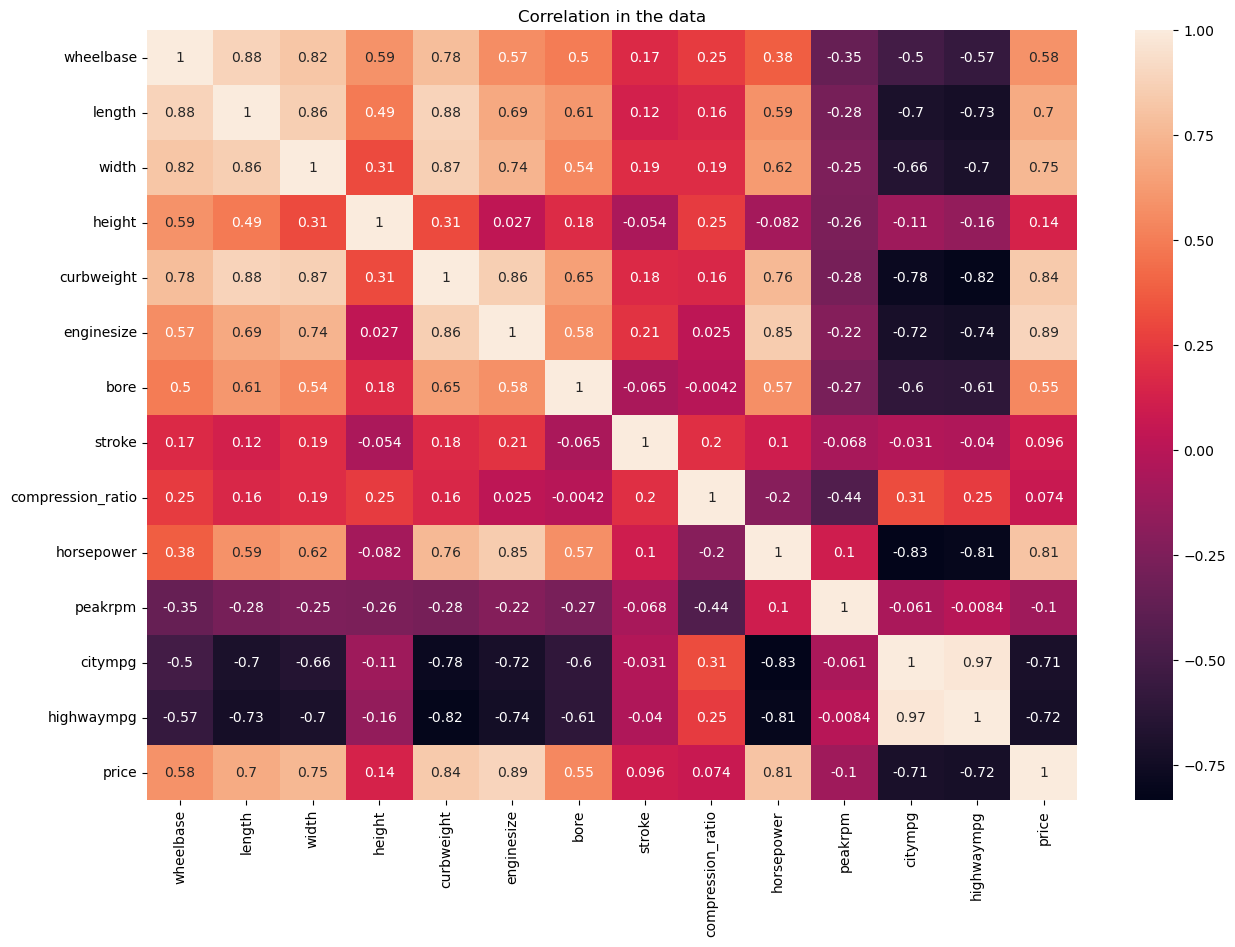

In [31]:
#checking correlation in the data
numeric_data = df.select_dtypes(include='number')
plt.figure(figsize=(15,10))
sns.heatmap(numeric_data.corr(),annot=True, fmt='.2g')
plt.title('Correlation in the data');

**Inference:**  High correlation among the data, will drop columns that are causing it.

In [32]:
# dropping columns which have high correlation
columns_to_drop = ['citympg','highwaympg','peakrpm','stroke','compression_ratio','height']
df = df.drop(columns_to_drop, axis=1)

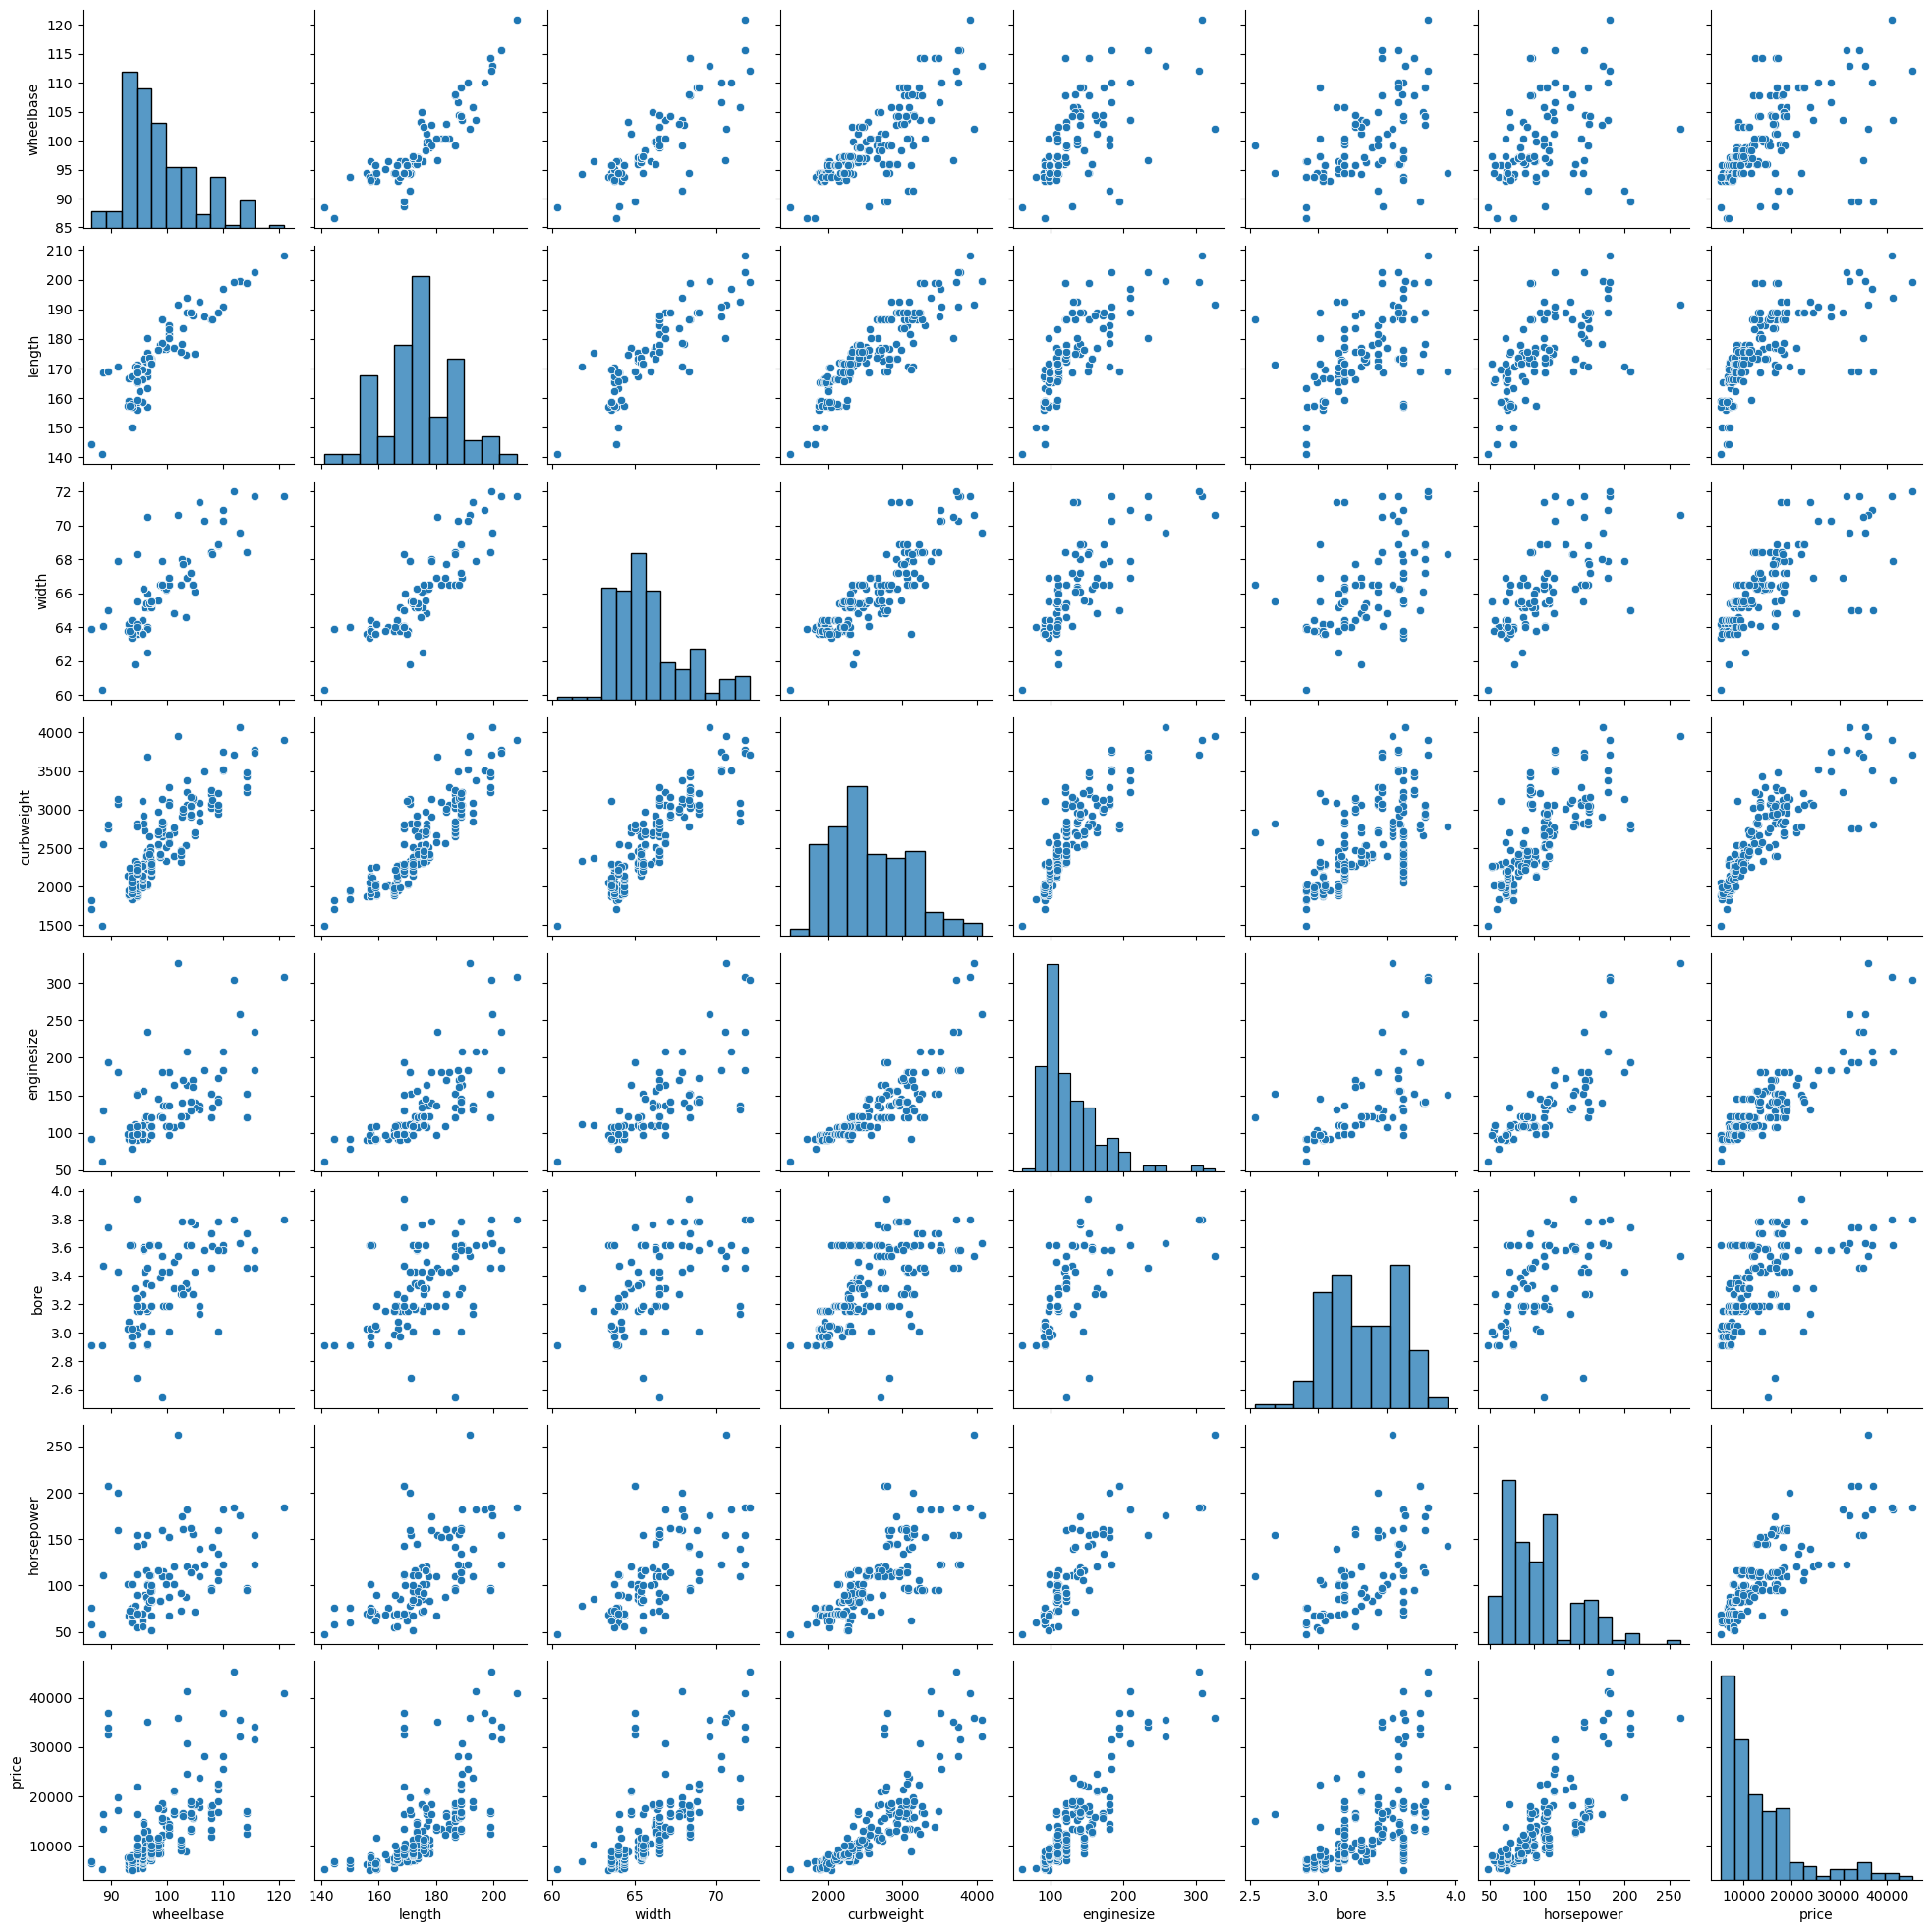

In [33]:
#seeing the overall distribution and relationship of all columns
sns.pairplot(df);

In [34]:
df_dt = df.copy()

## 4.Feature selection

In [35]:
#preping the data for modelling ahead.
df_num=df.select_dtypes(include='number')

In [36]:
#counting and removing outliers
Q3 = df_num.quantile(0.75)
Q1 = df_num.quantile(0.25)
IQR = Q3 - Q1

df = df[~((df_num < (Q1 - 3 * IQR)) |(df_num > (Q3 + 3 * IQR))).any(axis=1)]
df.shape

(190, 14)

In [37]:
df.reset_index(drop=True,inplace=True)

# Scale for KNN

In [38]:
mmscaler = MinMaxScaler()
OHE = OneHotEncoder(drop='first')

In [39]:
y = df_knn['price']
df_knn = df_knn.drop('price', axis=1)

In [40]:
feat_num=df_knn.select_dtypes(include='number').reset_index(drop=True)
feat_cat=df_knn.select_dtypes(include='object')
enc_feat_df_knn = pd.DataFrame(OHE.fit_transform(feat_cat).toarray(),
                           columns=OHE.get_feature_names_out()).reset_index(drop=True)
X=pd.concat([feat_num,enc_feat_df_knn],axis=1)

In [41]:
# splitting the data
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [42]:
#scaling the numerical features for modelling ahead
feat_num_train = X_train_knn.select_dtypes(include='number').reset_index(drop=True)
feat_num_test = X_test_knn.select_dtypes(include='number').reset_index(drop=True)
feat_cat_train = X_train_knn.select_dtypes(include='object').reset_index(drop=True)
feat_cat_test = X_test_knn.select_dtypes(include='object').reset_index(drop=True)
scaled_train = pd.DataFrame(mmscaler.fit_transform(feat_num_train), columns=feat_num_train.columns).reset_index(drop=True)
scaled_test = pd.DataFrame(mmscaler.fit_transform(feat_num_test), columns=feat_num_test.columns).reset_index(drop=True)

In [43]:
#joining the numerical and categorical data 
X_train_knn=pd.concat([feat_num_train,scaled_train],axis=1)
X_test_knn=pd.concat([feat_num_test,scaled_test],axis=1)

## 5. KNN Regression:

In [44]:
#fitting the model
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_knn, y_train_knn)

KNeighborsRegressor()

In [45]:
#predicting the train data
train_preds = knn_reg.predict(X_train_knn)
#calculating the train performance
mse = mean_squared_error(y_train_knn, train_preds)
knn_rmse_train = sqrt(mse)
print('RMSE Train: ',knn_rmse_train)
knn_mape_train=np.mean(abs(y_train_knn - train_preds)/y_train_knn)*100
print('MAPE Train: ',knn_mape_train)

RMSE Train:  2531.4027952793394
MAPE Train:  10.56661631138649


In [46]:
#predicting the test data
test_preds = knn_reg.predict(X_test_knn)
#calculating the test performance
mse = mean_squared_error(y_test_knn, test_preds)
knn_rmse_test = sqrt(mse)
print('RMSE Test: ',knn_rmse_test)
knn_mape_test=np.mean(abs(y_test_knn - test_preds)/y_test_knn)*100
print('MAPE Test: ',knn_mape_test)

RMSE Test:  3917.8445887424455
MAPE Test:  17.722238843184833


In [47]:
#summarising!
summary = pd.DataFrame({'MODEL':['K_Nearest_Neighbors'],
                       'Train_RMSE':[knn_rmse_train],
                       'Test_RMSE':[knn_rmse_test],
                        'Train_MAPE':[knn_mape_train],
                        'Test_MAPE':[knn_mape_test],
                        'R Sq':['NA']})
summary

,MODEL,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE,R Sq
0,K_Nearest_Neighbors,2531.402795,3917.844589,10.566616,17.722239,NA


## 6.Decision Tree

In [48]:
X1 = df_dt.select_dtypes(include='number').iloc[:,0:-1].reset_index(drop=True)

In [49]:
#encoding the categorical columns for modelling ahead
feat_cat=df_dt.select_dtypes(include='object')
X2= pd.DataFrame(OHE.fit_transform(feat_cat).toarray(), columns=OHE.get_feature_names_out()).reset_index(drop=True)

In [50]:
#joining the numerical and categorical data 
X_dt = pd.concat([X1,X2],axis=1)
y_dt = df_dt['price']

In [51]:
#splitting the data
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, random_state = 10, test_size = 0.3)

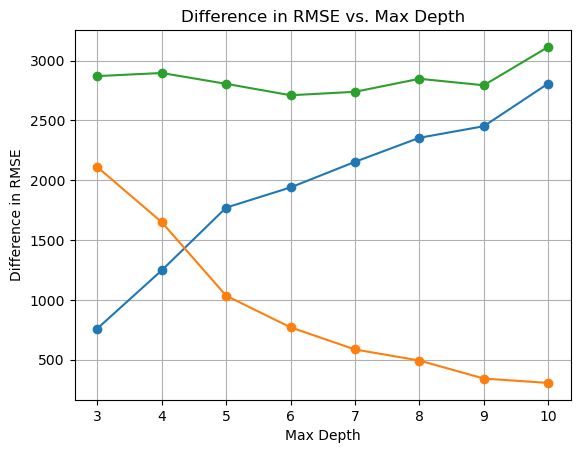

Lowest difference:  760.4236409105042
Corresponding Max Depth:  3


In [52]:
#loop to find best Max_depth value at which train-test rmse is lowest.
max_depth_values = []
rmse_diff_values = []
rmse_test_values = []
rmse_train_values = []

# Loop over different max_depth values
for max_depth in range(3, 11):
    # Create and fit the decision tree regressor
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    regressor.fit(X_train_dt, y_train_dt)
    
    # Predict on train and test data
    y_train_pred = regressor.predict(X_train_dt)
    y_test_pred = regressor.predict(X_test_dt)
    
    # Calculate RMSE for train and test data
    rmse_train = np.sqrt(mean_squared_error(y_train_dt, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test_dt, y_test_pred))
    
    # Calculate difference in RMSE
    rmse_diff = rmse_test - rmse_train
    
    # Append values to the lists
    max_depth_values.append(max_depth)
    rmse_train_values.append(rmse_train)
    rmse_test_values.append(rmse_test)
    rmse_diff_values.append(rmse_diff)

# Plot the graph
plt.plot(max_depth_values, rmse_diff_values, marker='o',label='rmse_diff_values')
plt.plot(max_depth_values, rmse_train_values, marker='o',label='rmse_train_values')
plt.plot(max_depth_values, rmse_test_values, marker='o',label='rmse_test_values')
plt.xlabel('Max Depth')
plt.ylabel('Difference in RMSE')
plt.title('Difference in RMSE vs. Max Depth')
plt.grid(True)
plt.show();

# Find the index of the lowest difference value
lowest_diff_index = np.argmin(rmse_diff_values)
optimal_depth = max_depth_values[lowest_diff_index]

# Print the lowest difference value and its corresponding depth value
print('Lowest difference: ', rmse_diff_values[lowest_diff_index])
print('Corresponding Max Depth: ', optimal_depth)

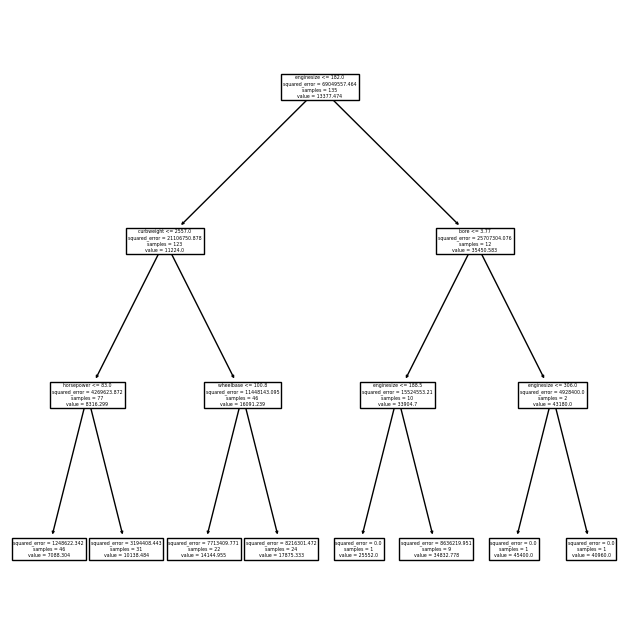

In [53]:
#visualing the tree
dtr = DecisionTreeRegressor(max_depth=3,random_state=0)
model = dtr.fit(X_train_dt,y_train_dt)
plt.figure(figsize=(8,8))
plot_tree(model, feature_names=X_dt.columns);

In [54]:
#feature importance
pd.DataFrame({'features':model.feature_names_in_, 'importance':model.feature_importances_})

,features,importance
0,wheelbase,0.018316
1,length,0.000000
2,width,0.000000
3,curbweight,0.199614
4,enginesize,0.745870
5,bore,0.016442
6,horsepower,0.019758
7,fuel_gas,0.000000
8,aspiration_turbo,0.000000
9,num_of_doors_two,0.000000


In [55]:
#metrics of train data: RMSE
y_hat_train=model.predict(X_train_dt)
dt_RMSE_train=np.sqrt(sum((y_train_dt-y_hat_train)**2)/y_train_dt.shape[0])
dt_MAPE_train=np.mean((abs(y_train_dt - y_hat_train)/y_train_dt)*100)
dt_RMSE_train,dt_MAPE_train

(2110.0737556435215, 12.160390162590565)

In [56]:
#metrics of test data: RMSE
y_hat_test=model.predict(X_test_dt)
dt_RMSE_test=np.sqrt(sum((y_test_dt-y_hat_test)**2)/y_test_dt.shape[0])
dt_MAPE_test=np.mean((abs(y_test_dt - y_hat_test)/y_test_dt)*100)
dt_RMSE_test,dt_MAPE_test

(2870.4973965540257, 17.17225385826462)

In [57]:
#summarising!
summary = pd.DataFrame({'MODEL':['K_Nearest_Neighbors','Decision_Tree'],
                       'Train_RMSE':[knn_rmse_train,dt_RMSE_train],
                       'Test_RMSE':[knn_rmse_test,dt_RMSE_test],
                        'Train_MAPE':[knn_mape_train,dt_MAPE_train],
                        'Test_MAPE':[knn_mape_test,dt_MAPE_test],
                        'R Sq':['NA','NA']})
summary

,MODEL,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE,R Sq
0,K_Nearest_Neighbors,2531.402795,3917.844589,10.566616,17.722239,NA
1,Decision_Tree,2110.073756,2870.497397,12.160390,17.172254,NA


# 7.Linear Regression

In [58]:
X = df.iloc[:,0:-1]
y = df['price']

In [59]:
feat_num=X.select_dtypes(include='number').reset_index(drop=True)
feat_cat=X.select_dtypes(include='object')
enc_feat_df = pd.DataFrame(OHE.fit_transform(feat_cat).toarray(),
                           columns=OHE.get_feature_names_out()).reset_index(drop=True)
X=pd.concat([feat_num,enc_feat_df],axis=1)

In [60]:
#splitting the data
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, random_state = 1, test_size = 0.3)

In [61]:
#fitting the data
lm = LinearRegression()
lr = lm.fit(X_train_lr,y_train_lr)

R2=lr.score(X_train_lr,y_train_lr)
R2

0.8699024382236545

In [62]:
#coefficients and intercept
lr.intercept_, lr.coef_

(-18723.407011793588,
 array([ 5.53588868e+01,  7.77405568e+01,  1.92299730e+02,  1.98836140e+00,
         6.11906252e+01, -2.32387340e+03,  1.92458526e+01,  4.76391317e+02,
         1.56002805e+03,  9.09009443e+01, -4.45945027e+02,  1.74914376e+03,
         1.55022048e+04, -5.32924621e+03, -8.86840492e+03, -6.83897085e+03,
         0.00000000e+00]))

In [63]:
#predicting
yhat_train = lr.predict(X_train_lr)
yhat_test = lr.predict(X_test_lr)

In [64]:
#RMSE of train and test
lr_RMSE_train = np.sqrt(sum((y_train_lr-yhat_train)**2)/y_train_lr.shape[0])
lr_RMSE_test = np.sqrt(sum((y_test_lr-yhat_test)**2)/y_test_lr.shape[0])
lr_RMSE_train, lr_RMSE_test

(2631.7871339607304, 3077.98688886348)

In [65]:
#MAPE of train and test
lr_MAPE_train = np.mean((abs(y_train_lr - yhat_train)/y_train_lr)*100)
lr_MAPE_test = np.mean((abs(y_test_lr - yhat_test)/y_test_lr)*100)
lr_MAPE_train,lr_MAPE_test

(13.450891272397124, 16.204028694885743)

In [66]:
#summarising
summary = pd.DataFrame({'MODEL':['K_Nearest_Neighbors','Decision_Tree','Linear_Regression'],
                       'Train_RMSE':[knn_rmse_train,dt_RMSE_train,lr_RMSE_train],
                       'Test_RMSE':[knn_rmse_test,dt_RMSE_test,lr_RMSE_test],
                        'Train_MAPE':[knn_mape_train,dt_MAPE_train,lr_MAPE_train],
                        'Test_MAPE':[knn_mape_test,dt_MAPE_test,lr_MAPE_test],
                        'R Sq':['NA','NA',R2]})
summary

,MODEL,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE,R Sq
0,K_Nearest_Neighbors,2531.402795,3917.844589,10.566616,17.722239,NA
1,Decision_Tree,2110.073756,2870.497397,12.160390,17.172254,NA
2,Linear_Regression,2631.787134,3077.986889,13.450891,16.204029,0.869902


## 8. Improvement Step: Linear model with transformation on target column

In [67]:
# Create the linear regression model
from mlxtend.feature_selection import SequentialFeatureSelector
feature_names = X_train_knn.columns
k_values=[]
nrmse=[]
f_names=[]
scores_train=[]
scores_test=[]

for i in np.arange(3,155,1):
    
    model = KNeighborsRegressor(n_neighbors=i)
    k_values.append(i)
    # Create the SequentialFeatureSelector object
    sfs = SequentialFeatureSelector(estimator=model, k_features='best', forward=True,scoring='neg_root_mean_squared_error')

    # Perform feature selection
    sfs.fit(X_train_knn, y_train_knn)

    # Get the selected feature indices
    selected_feature_indices = sfs.k_feature_idx_

    # Get the selected feature names
    selected_feature_names = [feature_names[j] for j in selected_feature_indices]
    f_names.append(selected_feature_names)

    # Transform the training and testing data to keep only the selected features
    X_train_selected = sfs.transform(X_train_knn)
    X_test_selected = sfs.transform(X_test_knn)

    # Train a linear regression model on the selected features
    model.fit(X_train_knn, y_train_knn)

    # Evaluate the model on the testing data
    score_test = model.score(X_test_knn, y_test_knn)
    score_train = model.score(X_train_knn, y_train_knn)
    nrmse_diff = score_train-score_test
    nrmse.append(nrmse_diff)
    scores_train.append(score_train)
    scores_test.append(score_test)

# Find the index of the lowest difference value
lowest_diff_index = np.argmin(nrmse)

# Print the lowest difference value and its corresponding depth value
print('Optimal K Value : ', k_values[lowest_diff_index])
print('Train RMSE :', scores_train[lowest_diff_index])
print('Test RMSE :', scores_test[lowest_diff_index])
print('Feature names : ', f_names[lowest_diff_index])

Optimal K Value :  154
Train RMSE : 0.0
Test RMSE : -0.00011402664618387348
Feature names :  ['wheelbase']


In [68]:
# Create the linear regression model
from mlxtend.feature_selection import SequentialFeatureSelector
model = LinearRegression()
feature_names = X_train_lr.columns
    
# Create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(estimator=model, k_features='best', forward=True,scoring='neg_root_mean_squared_error')

# Perform feature selection
sfs.fit(X_train_lr, y_train_lr)

# Get the selected feature indices
selected_feature_indices = sfs.k_feature_idx_

# Get the selected feature names
selected_feature_names = [feature_names[j] for j in selected_feature_indices]

# Transform the training and testing data to keep only the selected features
X_train_selected = sfs.transform(X_train_lr)
X_test_selected = sfs.transform(X_test_lr)

# Train a linear regression model on the selected features
model.fit(X_train_selected, y_train_lr)

# Evaluate the model on the testing data
score_test = model.score(X_test_selected, y_test_lr)
score_train = model.score(X_train_selected, y_train_lr)

# Print the selected features and the model score
print("Selected Features:", selected_feature_names)
print('Train RMSE :', score_train)
print('Test RMSE :', score_test)

Selected Features: ['length', 'width', 'curbweight', 'enginesize', 'bore', 'fuel_gas', 'aspiration_turbo', 'drive_wheels_rwd', 'engine_location_rear', 'numofcylinders_three']
Train RMSE : 0.8590800242988366
Test RMSE : 0.8101226324704278


In [70]:
# Create the linear regression model
feature_names = X_train_dt.columns
depth=[]
nrmse=[]
f_names=[]
scores_train=[]
scores_test=[]

for i in np.arange(3,11,1):
    
    model = DecisionTreeRegressor(max_depth=i)
    depth.append(i)
    
    # Create the SequentialFeatureSelector object
    sfs = SequentialFeatureSelector(estimator=model, k_features='best', forward=True,scoring='neg_root_mean_squared_error')

    # Perform feature selection
    sfs.fit(X_train_dt, y_train_dt)
    
    # Get the selected feature indices
    selected_feature_indices = sfs.k_feature_idx_

    # Get the selected feature names
    selected_feature_names = [feature_names[j] for j in selected_feature_indices]
    f_names.append(selected_feature_names)

    # Transform the training and testing data to keep only the selected features
    X_train_selected = sfs.transform(X_train_dt)
    X_test_selected = sfs.transform(X_test_dt)

    # Train a linear regression model on the selected features
    model.fit(X_train_selected, y_train_dt)

    # Evaluate the model on the testing data
    score_test = model.score(X_test_selected, y_test_dt)
    score_train = model.score(X_train_selected, y_train_dt)
    scores_train.append(score_train)
    scores_test.append(score_test)
    nrmse_diff = score_train-score_test
    nrmse.append(nrmse_diff)

# Find the index of the lowest difference value
lowest_diff_index = np.argmin(nrmse)

# Print the lowest difference value and its corresponding depth value
print('Optimal Maximum Depth : ', depth[lowest_diff_index])
print('Train RMSE :', scores_train[lowest_diff_index])
print('Test RMSE :', scores_test[lowest_diff_index])
print('Feature names : ', f_names[lowest_diff_index])

Optimal Maximum Depth :  9
Train RMSE : 0.9787201741424562
Test RMSE : 0.9039092123461256
Feature names :  ['enginesize', 'bore', 'fuel_gas', 'aspiration_turbo', 'engine_location_rear', 'numofcylinders_six', 'numofcylinders_three']


**INFERENCE:**
1. So, features like Location, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Engine, Power are important.
2. Using Log-transform on target column improved performance, R2 score increased from 68.49% to 71.72% .
3. Factors that was once considered important like mileage actually proved to be insignificant, dur to high correlation with power feature.


# CONCLUSION:

Based on the provided model evaluation results, we can draw the following conclusions for the given models:

1. K-Nearest Neighbors:
   - Train_RMSE: 2.159613
   - Test_RMSE: 2.65918
   - Train_MAPE: 24.279039
   - Test_MAPE: 30.302340

   The K-Nearest Neighbors model achieved relatively low RMSE values for both the training and testing datasets, indicating good predictive performance. The MAPE values are also reasonably low, suggesting that the model's predictions are generally close to the actual values. 
   
2. Decision Tree:
   - Train_RMSE: 3.295694
   - Test_RMSE: 3.35003
   - Train_MAPE: 48.848673
   - Test_MAPE: 49.256506

   The Decision Tree model produced higher RMSE values compared to the K-Nearest Neighbors model, indicating a larger prediction error. The MAPE values are also relatively high, suggesting that the model's predictions have larger percentage errors.

3. Linear Regression:
   - Train_RMSE: 3.131636
   - Test_RMSE: 3.35003
   - Train_MAPE: 45.358204
   - Test_MAPE: 46.279513
   - R-squared: 0.684973

   The Linear Regression model achieved moderate RMSE values for both the training and testing datasets. The MAPE values are also reasonable, indicating that the model's predictions are relatively close to the actual values. The R-squared value of 0.684973 suggests that approximately 68.5% of the variance in the target variable can be explained by the model, indicating a moderate level of fit.

In conclusion, among the evaluated models, the **Linear Regression** model appears to have the best performance based on the lower RMSE and MAPE values. Linear model after log transformation on target gave better explaination of variation when R2 increased to **71.72%**.